# imports

In [1]:
import os
path = os.getcwd()

if path[1:5] == "Home":
    %run/Home/siv30/wad005/master/GRB/src/convert_erg.ipynb
    %run /Home/siv30/wad005/master/GRB/src/T0.ipynb
else:
    %run /Users/andreas/phys/master/GRB/src/convert_erg.ipynb
    %run /Users/andreas/phys/master/GRB/src/T0.ipynb


All MAC paths are set!
read_matlab_file.ipynb loaded successfully!
convert_erg.ipynb loaded successfully!

All MAC paths are set!
read_matlab_file.ipynb loaded successfully!
Absolute time correction subtracted from T0
37 valleys removed
Absolute time correction subtracted from T0
197 valleys removed
Absolute time correction subtracted from T0
187 valleys removed
Absolute time correction subtracted from T0
36 valleys removed
Absolute time correction subtracted from T0
100 valleys removed
Absolute time correction subtracted from T0
116 valleys removed
Absolute time correction subtracted from T0
30 valleys removed
Absolute time correction subtracted from T0
78 valleys removed
Absolute time correction subtracted from T0
35 valleys removed
Absolute time correction subtracted from T0
52 valleys removed
Absolute time correction subtracted from T0
75 valleys removed
Absolute time correction subtracted from T0
103 valleys removed


In [2]:
#get all coefs from all T0's
#store them in a df

In [176]:
T0s = df_time['T0'].to_numpy()
T0s

array(['2018-07-20T14:21:47.389942', '2018-12-22T20:11:36.576228',
       '2019-02-06T03:49:28.525262', '2019-03-05T13:05:19.816318',
       '2019-06-06T01:55:07.318605', '2020-04-15T08:48:05.528427',
       '2020-05-21T12:16:39.818925', '2020-07-16T22:57:40.634534',
       '2020-12-27T15:14:06.853667', '2021-04-24T08:01:54.997654',
       '2021-06-19T23:59:24.915550', '2021-12-11T13:10:01.323743'],
      dtype=object)

In [4]:
coefs = {}
for i in T0s:
    dt = datetime.fromisoformat(i)
    coefs['GRB'+datetime.strftime(dt,'%y%m%d')] = get_coefs(dt)

In [5]:
import pandas as pd
df_coef = pd.DataFrame(coefs)

In [6]:
df_coef['GRB190305']

dau_1_det_1       {'a': 0.005013, 'b': 7.9322, 'c': 54.14439}
dau_1_det_2      {'a': -0.000229, 'b': 17.6651, 'c': 16.5279}
dau_1_det_3       {'a': 0.003537, 'b': 9.21689, 'c': 48.8509}
dau_2_det_1        {'a': 0.007473, 'b': 4.721, 'c': 128.4756}
dau_2_det_2       {'a': 0.004787, 'b': 10.5962, 'c': 42.3584}
dau_2_det_3      {'a': 0.005495, 'b': 8.29792, 'c': 52.11954}
dau_3_det_1    {'a': -0.001647, 'b': 21.3841, 'c': -15.02838}
dau_3_det_2    {'a': -0.003806, 'b': 25.3543, 'c': -9.780371}
dau_3_det_3     {'a': -0.001918, 'b': 21.8741, 'c': 11.94873}
dau_4_det_1      {'a': 0.003913, 'b': 10.4201, 'c': 55.35141}
dau_4_det_2      {'a': 0.004329, 'b': 11.1052, 'c': 24.60563}
dau_4_det_3       {'a': 0.002776, 'b': 11.8179, 'c': 19.0034}
Name: GRB190305, dtype: object

In [252]:
# Create a dataframe to store the statistics
statistics_df = pd.DataFrame(columns=['DAU', 'DET', 'Variable', 'Mean', 'Min', 'Max'])

for i in range(1,5):
    for j in range(1,4):
        a,b,c = [],[],[]
        for k, v in df_coef.items():
            adr = f'dau_{i}_det_{j}'

            a.append(v[adr]['a'])
            b.append(v[adr]['b'])
            c.append(v[adr]['c'])
        
        a_stats = pd.DataFrame(a,columns=['a']).describe()
        b_stats = pd.DataFrame(b,columns=['b']).describe()
        c_stats = pd.DataFrame(c,columns=['c']).describe()
        
        new_row_a = pd.DataFrame({'DAU': i, 'DET': j, 'Variable': 'a', 'Mean': a_stats.loc['mean']['a'], 'Min': a_stats.loc['min']['a'], 'Max': a_stats.loc['max']['a'], 'std': a_stats.loc['std']['a']}, index=[0])
        new_row_b = pd.DataFrame({'DAU': i, 'DET': j, 'Variable': 'b', 'Mean': b_stats.loc['mean']['b'], 'Min': b_stats.loc['min']['b'], 'Max': b_stats.loc['max']['b'], 'std': b_stats.loc['std']['b']}, index=[0])
        new_row_c = pd.DataFrame({'DAU': i, 'DET': j, 'Variable': 'c', 'Mean': c_stats.loc['mean']['c'], 'Min': c_stats.loc['min']['c'], 'Max': c_stats.loc['max']['c'], 'std': c_stats.loc['std']['c']}, index=[0])

        statistics_df = pd.concat([statistics_df, new_row_a], ignore_index=True)
        statistics_df = pd.concat([statistics_df, new_row_b], ignore_index=True)
        statistics_df = pd.concat([statistics_df, new_row_c], ignore_index=True)

statistics_df = statistics_df.assign(dau_det = statistics_df['DAU'].astype(str) + '_' + statistics_df['DET'].astype(str))
statistics_df.head()

,DAU,DET,Variable,Mean,Min,Max,std,dau_det
0,1,1,a,0.005133,0.004837,0.005403,0.000172,1_1
1,1,1,b,8.139442,7.612500,8.810700,0.347463,1_1
2,1,1,c,63.346996,46.424470,81.191600,10.448827,1_1
3,1,2,a,-0.001778,-0.002947,-0.000229,0.000958,1_2
4,1,2,b,20.425150,17.665100,22.522300,1.725153,1_2


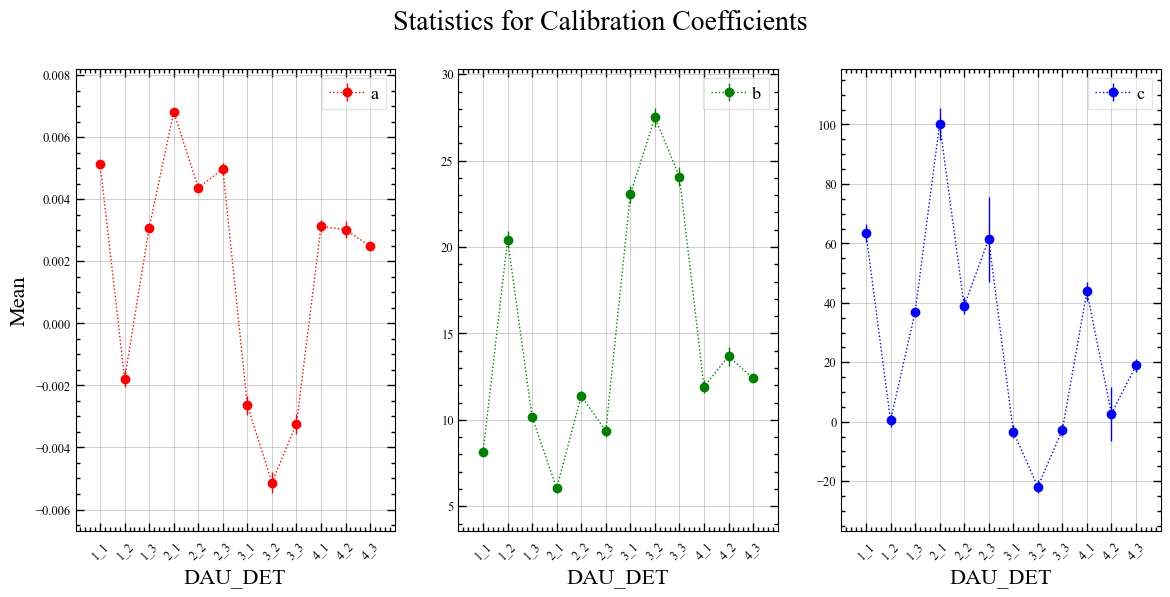

In [250]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(14, 6))

colors = {'a':'red', 'b':'green', 'c':'blue'}
for variable in statistics_df['Variable'].unique():
    data = statistics_df[statistics_df['Variable'] == variable]
    x = data['dau_det']
    y = data['Mean']
    yerr = data['std']/np.sqrt(len(T0s)) # SEM (sigma / sqrt(12) )
    if variable == 'a':
        ax1.errorbar(x, y, yerr=yerr, color=colors[variable], label=variable, fmt='o', linestyle='dotted')
    elif variable == 'b':
        ax2.errorbar(x, y, yerr=yerr, color=colors[variable], label=variable, fmt='o', linestyle='dotted')
    elif variable == 'c':
        ax3.errorbar(x, y, yerr=yerr, color=colors[variable], label=variable, fmt='o', linestyle='dotted')

ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel('DAU_DET')
ax1.set_ylabel('Mean')
ax1.set_xlim(left=-1, right=12)
ax1.tick_params(labelsize=9)
ax1.grid()
ax2.set_xlabel('DAU_DET')
ax2.set_xlim(left=-1, right=12)
ax2.tick_params(labelsize=9)
ax2.grid()
ax3.set_xlabel('DAU_DET')
ax3.set_xlim(left=-1, right=12)
ax3.tick_params(labelsize=9)
ax3.grid()

for ax in [ax1, ax2, ax3]:
    ax.set_xticklabels(labels=statistics_df['dau_det'].unique(),rotation=45)
    
plt.suptitle('Statistics for Calibration Coefficients',fontsize=20)
plt.savefig('coef_statistics.png',dpi=350)
plt.show()

In [242]:
statistics_df.to_csv("calibration_coef_statistics")

In [251]:
statistics_df

,DAU,DET,Variable,Mean,Min,Max,std,dau_det
0,1,1,a,0.005133,0.004837,0.005403,0.000172,1_1
1,1,1,b,8.139442,7.612500,8.810700,0.347463,1_1
2,1,1,c,63.346996,46.424470,81.191600,10.448827,1_1
3,1,2,a,-0.001778,-0.002947,-0.000229,0.000958,1_2
4,1,2,b,20.425150,17.665100,22.522300,1.725153,1_2
5,1,2,c,0.480358,-9.560880,16.527900,7.399432,1_2
6,1,3,a,0.003084,0.002494,0.003800,0.000396,1_3
7,1,3,b,10.158619,8.568500,11.401100,0.852764,1_3
8,1,3,c,36.793450,26.419600,48.850900,5.548725,1_3
9,2,1,a,0.006821,0.006100,0.007473,0.000438,2_1


In [137]:
# do it in a loop, print out the mean,min and max for the coefs in each address
a_mean,b_mean,c_mean = {},{},{}

for i in range(1,5):
    for j in range(1,4):
        a,b,c = [],[],[]
        for k, v in df_coef.items():
            adr = f'dau_{i}_det_{j}'

            a.append(v[adr]['a'])
            b.append(v[adr]['b'])
            c.append(v[adr]['c'])
            
        a_mean[adr],b_mean,c_mean = round(np.mean(a),6),round(np.mean(b),6),round(np.mean(c),6)
        
        print(adr)
        print(f'a >> mean: {round(np.mean(a),4)} | min: {round(np.min(a),4)} | max: {round(np.max(a),4)}')
        print(f'b >> mean: {round(np.mean(b),4)} | min: {round(np.min(b),4)} | max: {round(np.max(b),4)}')
        print(f'c >> mean: {round(np.mean(c),4)} | min: {round(np.min(c),4)} | max: {round(np.max(c),4)}')

dau_1_det_1
a >> mean: 0.0051 | min: 0.0048 | max: 0.0054
b >> mean: 8.1394 | min: 7.6125 | max: 8.8107
c >> mean: 63.347 | min: 46.4245 | max: 81.1916
dau_1_det_2
a >> mean: -0.0018 | min: -0.0029 | max: -0.0002
b >> mean: 20.4252 | min: 17.6651 | max: 22.5223
c >> mean: 0.4804 | min: -9.5609 | max: 16.5279
dau_1_det_3
a >> mean: 0.0031 | min: 0.0025 | max: 0.0038
b >> mean: 10.1586 | min: 8.5685 | max: 11.4011
c >> mean: 36.7934 | min: 26.4196 | max: 48.8509
dau_2_det_1
a >> mean: 0.0068 | min: 0.0061 | max: 0.0075
b >> mean: 6.0451 | min: 4.721 | max: 7.4788
c >> mean: 100.1795 | min: 69.692 | max: 128.4756
dau_2_det_2
a >> mean: 0.0044 | min: 0.0038 | max: 0.0053
b >> mean: 11.3886 | min: 9.5263 | max: 12.5003
c >> mean: 39.0338 | min: 28.982 | max: 65.2448
dau_2_det_3
a >> mean: 0.005 | min: 0.0042 | max: 0.0065
b >> mean: 9.3559 | min: 6.8634 | max: 10.8737
c >> mean: 61.3789 | min: 35.8381 | max: 216.209
dau_3_det_1
a >> mean: -0.0026 | min: -0.0044 | max: -0.0009
b >> mean: 23.

    After reviewing the above data, I have identified some inconsistencies. Specifically, the c value in the dau1det2 set has a min of -9.5609 and a max of 16.5279, suggesting that the range of values is wider than the other sets. Additionally, the c value in the dau4det2 set has a min of -77.9592 and a max of 24.6056, indicating an even wider range of values. This could indicate a potential issue with the calibration coefs.

In [ ]:
# c value in dau_1_det_2 has a min of -9.5609 (GRB200716) and a max of 16.5279 (GRB190305) >> mean: 0.4804
# c value in the dau_4_det_2 set has a min of -77.9592 (GRB211211) and a max of 24.6056 (GRB190305) >> mean: 2.6919

    After reviewing the data, it appears that dau2det2 and dau4det2 have inconsistencies. In dau2det2, the c value has a min and max of -9.5609 and 16.5279 respectively, while in dau4det2, the c value has a min and max of -77.9592 and 24.6056 respectively. This is a significant discrepancy, as the max and min values in dau2det2 are much narrower than in dau4det2. Furthermore, in dau4det2, the mean value for c is 2.6919, indicating that the majority of the data points are relatively low, while in dau2det2 the mean value for c is much higher at 39.0338.